In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib
import os

import scipy.stats as st

C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
scratchHPC = r'\\rb-hpc.de.bosch.com\hro7rng\scratch\MultiPhase'

In [3]:
StudienOrdner = r'Archive_importand_eval\60_Stresscontrolled_2'
StudienOrdner = os.path.join(scratchHPC, StudienOrdner)


ImageOrdner = os.path.join(StudienOrdner, '_image' )

if not os.path.exists(ImageOrdner):
    os.makedirs(ImageOrdner)

In [4]:
lf_csv = r'lifetime_combined.csv'
lf_csv = os.path.join(StudienOrdner, lf_csv)

In [5]:
df_lf = pd.read_csv(lf_csv)

In [6]:
ll_volf = df_lf['ModelName'].tolist()
ll_volf = [float(kk[kk.rfind('_')+15:])   for kk in ll_volf]

ll_Seed = df_lf['ModelName'].tolist()
ll_Seed = [str(kk[kk.find('_')+5:kk.find('_Str')])   for kk in ll_Seed]

ll_stress = df_lf['ModelName'].tolist()
ll_stress = [float(kk[kk.find('_Stress')+7:kk.find('_Volu')])   for kk in ll_stress]

In [7]:
minimia_vol = min(ll_volf)
maxima_vol = max(ll_volf)

In [8]:
df_lf['Volume_Martensite'] = ll_volf
df_lf['Seed'] = ll_Seed
df_lf['StressAmp'] = ll_stress


df_wholMod = df_lf[df_lf['Phase']=='wholeMod']

In [9]:
#temporär da 75 nicht vollständig vorhanden
ll_volf = [kk for kk in ll_volf if kk != 75.]
print(np.unique(ll_volf))

[  0.  80.  85.  90.  95. 100.]


In [10]:
norm = matplotlib.colors.Normalize(vmin=minimia_vol, vmax=maxima_vol, clip=True)
mapper = matplotlib.cm.ScalarMappable(norm=norm) 

In [11]:
from scipy import optimize

def tfunktion(x_data, a,b):
    return a*(x_data**2)+b*x_data+x_data


In [12]:
params, params_covariance = optimize.curve_fit(tfunktion, df_wholMod['Lifetime'].tolist(), df_wholMod['StrainAmplitude'].tolist(),)

C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [13]:
df_wholMod

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed,StressAmp
0,0.0,StressTest1_Seed78333_Stress1000_VolumeFraction95,ALL,4350.404613,wholeMod,0.0,0.005206,9.250000e-07,1000.0000,0.0000,0.019555,0.042940,2.521240,1.724138,0,95.0,78333,1000.0
3,1.0,StressTest1_Seed22187_Stress1000_VolumeFraction75,ALL,3654.984183,wholeMod,0.0,0.005844,6.000000e-06,1000.0000,0.0000,0.021634,0.055524,2.521240,1.724138,0,75.0,22187,1000.0
6,2.0,StressTest1_Seed45213_Stress1000_VolumeFraction75,ALL,5225.320444,wholeMod,0.0,0.005806,6.470000e-06,1000.0000,0.0000,0.016129,0.061809,0.515708,1.724138,0,75.0,45213,1000.0
9,3.0,StressTest1_Seed61442_Stress1000_VolumeFractio...,ALL,12523.535733,wholeMod,0.0,0.005094,4.000000e-08,1000.0000,0.0000,0.002166,0.004797,0.515708,1.724138,0,100.0,61442,1000.0
11,4.0,StressTest1_Seed93426_Stress1000_VolumeFraction85,ALL,6055.991441,wholeMod,0.0,0.005499,3.215000e-06,1000.0000,0.0000,0.016142,0.058305,2.521240,1.724138,0,85.0,93426,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,25.0,DisTest_Seed22187_Stress750_VolumeFraction0,ALL,5662.437416,wholeMod,0.0,0.006170,1.661050e-04,749.9895,0.0005,0.016783,0.068003,2.521240,1.724138,0,0.0,22187,750.0
882,26.0,DisTest_Seed81296_Stress500_VolumeFraction0,ALL,109472.566046,wholeMod,0.0,0.002746,7.215000e-06,500.0000,0.0000,0.003012,0.009059,2.521240,1.724138,0,0.0,81296,500.0
884,27.0,DisTest_Seed54667_Stress500_VolumeFraction0,ALL,115040.514167,wholeMod,0.0,0.002733,7.600000e-06,500.0000,0.0000,0.002926,0.010593,2.521240,1.724138,0,0.0,54667,500.0
886,28.0,DisTest_Seed54667_Stress750_VolumeFraction0,ALL,4664.209427,wholeMod,0.0,0.006005,1.492500e-04,749.9915,0.0005,0.018781,0.078306,2.521240,1.724138,0,0.0,54667,750.0


In [14]:
colorswhole = df_wholMod['Volume_Martensite'].tolist()
un_voll = np.unique(colorswhole)
colorswhole = [float(c) for c in colorswhole]

strain_ll = np.unique(df_wholMod['StressAmp'].tolist())

dic_f_curve = {}
for  vol in un_voll:
    df_red = df_wholMod[df_wholMod['Volume_Martensite']==vol]
    params, params_covariance = optimize.curve_fit(tfunktion, df_red['Lifetime'].tolist(), df_red['StressAmp'].tolist())
    
    ll_mean_lifetimes = [np.min(df_red[df_red['StressAmp']==stra]['Lifetime'].tolist()) for stra in strain_ll]
    print(ll_mean_lifetimes)
    f_curve = [tfunktion(lf, params[0], params[1]) for lf in ll_mean_lifetimes]
    dic_f_curve[vol] = f_curve

print(dic_f_curve)

ValueError: zero-size array to reduction operation minimum which has no identity

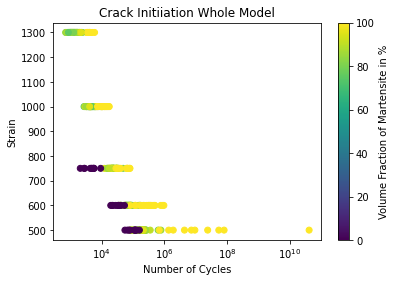

In [26]:

plt.scatter(df_wholMod['Lifetime'], df_wholMod['StressAmp'], c=colorswhole)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Whole Model')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
#plt.show()

tikzplotlib.save(os.path.join(ImageOrdner, 'ScatterLifetimeWholeMod.tex'))
plt.savefig(os.path.join(ImageOrdner, 'ScatterLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)

In [27]:
df_Ferrite = df_lf[df_lf['Phase']=='Ferrite']

In [28]:
colorsFerr = df_Ferrite['Volume_Martensite'].tolist()
colorsFerr = [float(c) for c in colorsFerr]

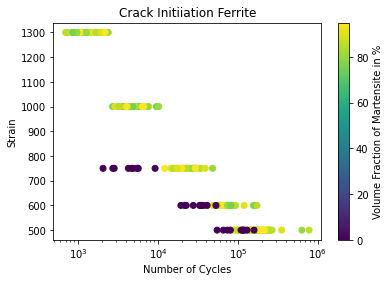

In [29]:
plt.scatter(df_Ferrite['Lifetime'], df_Ferrite['StressAmp'], c=colorsFerr)
cbar = plt.colorbar()
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Ferrite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

In [30]:
df_mart = df_lf[df_lf['Phase']=='Martensite']

In [31]:
colorsMart = df_mart['Volume_Martensite'].tolist()
colorsMart = [int(c) for c in colorsMart]

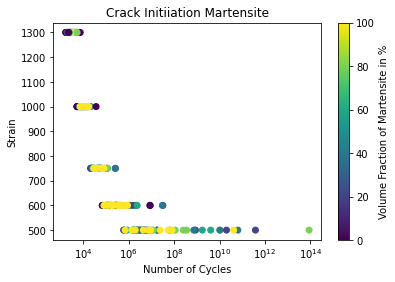

In [32]:
plt.scatter(df_mart['Lifetime'], df_mart['StressAmp'], c=colorsMart)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Martensite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

Abwärts erstelle confidence intervalle

In [33]:
strainll = np.unique(df_wholMod['StressAmp'].tolist())
dic_df_conf = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StressAmp': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StressAmp'] == strain]
            a = rdf['Lifetime'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_conf[dd] = df_conf

In [34]:
np.unique(ll_volf)

array([  0.,  80.,  85.,  90.,  95., 100.])

Plotten der confidence Intervalle

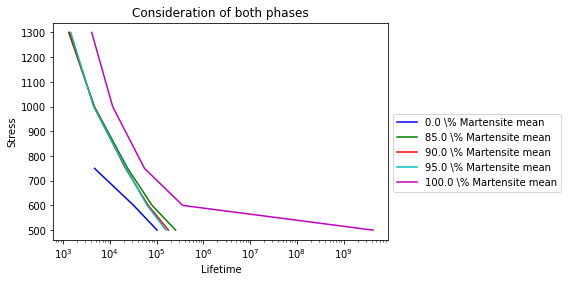

In [35]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y', 'maroon']
df_conf = dic_df_conf['whole']
volfll = [kk for kk in np.unique(ll_volf) if kk != 80.]
for num, vols in enumerate(np.unique(volfll)):

    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )

plt.ylabel('Stress')
plt.xlabel('Lifetime')

plt.title('Consideration of both phases')


tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeWholeMod.tex'))
plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)

[0.0, 85.0, 90.0, 95.0]


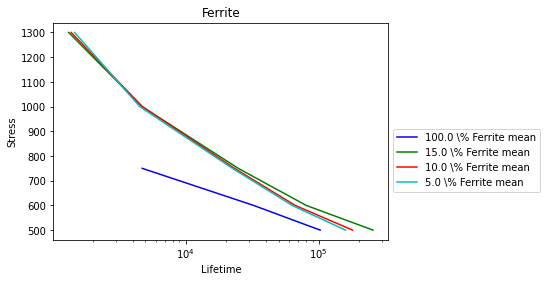

In [37]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y', 'maroon']
df_conf = dic_df_conf['Ferrite']
volls_red = []
#for num, vols in enumerate(np.unique(ll_volf)):
#    if vols in [95.0, 85.0,75.0]:
#        volls_red.append(vols)
vol_wo_mar = [kk for kk in np.unique(ll_volf) if kk not in [100., 80.]]
print(vol_wo_mar)
for num, vols in enumerate(vol_wo_mar):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(100-vols)+' \% Ferrite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )

plt.ylabel('Stress')
plt.xlabel('Lifetime')
plt.title('Ferrite')


tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeFerrite.tex'))

plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeFerrite.png'), bbox_inches='tight', dpi=150, transparent=True)

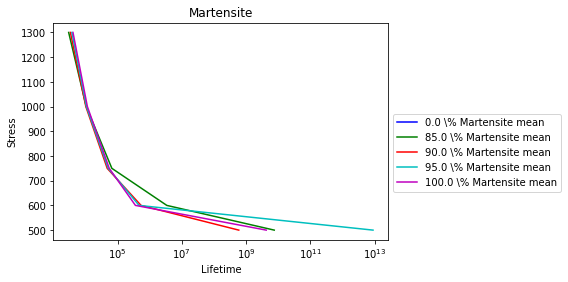

In [38]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y', 'maroon']
df_conf = dic_df_conf['Martensite']
volls_red = []
#for num, vols in enumerate(np.unique(ll_volf)):
#    if vols in [100.0, 95.0 ,85.0 ,75.0]:
#        volls_red.append(vols)
    
for num, vols in enumerate(np.unique(volfll)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.legend(loc = 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )

plt.title('Martensite')
plt.ylabel('Stress')
plt.xlabel('Lifetime')

tikzplotlib.save(os.path.join(ImageOrdner, 'ConfLifetimeMartensite.tex'))

plt.savefig(os.path.join(ImageOrdner, 'ConfLifetimeMartensite.png'), bbox_inches='tight', dpi=150, transparent=True)

Boxplotvarainte der Woehlerkurve

In [23]:
ImageBoxplots = os.path.join(ImageOrdner, 'Boxplots' )

if not os.path.exists(ImageBoxplots):
    os.makedirs(ImageBoxplots)

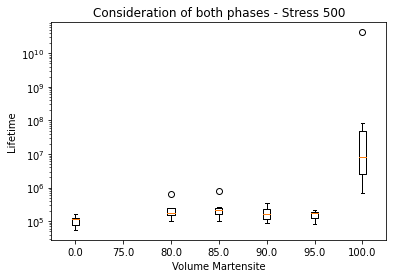

In [24]:
un_stress = np.unique(ll_stress)
stress = 500.0
ticklist = []
positions = [kk+1 for kk in range(len(un_voll))]
df_whole_bp = df_wholMod[df_wholMod['StressAmp']==stress]
for num, vols in enumerate(un_voll):
    bp = plt.boxplot(df_whole_bp[df_whole_bp['Volume_Martensite']==vols]['Lifetime'], positions=[num+1] )
    
    #ticklist.append(np.mean(positions))
    #positions = [kk+1+len(positions) for kk in positions]
    
xlabel = [str(kk) for kk in un_voll]
ticklist = [num +1 for num,kk in enumerate(un_voll)]
plt.xticks(ticklist, xlabel)

plt.ylabel('Lifetime')
plt.xlabel('Volume Martensite')
plt.title(f'Consideration of both phases - Stress {str(int(stress))}')
plt.yscale('log')
#plt.ylim(10**2, 5*10**5)
tikzplotlib.save(os.path.join(ImageBoxplots, f'Whole_{str(int(stress))}_Life_over_Vol_Box.tex'))

plt.savefig(os.path.join(ImageBoxplots, f'Whole_{str(int(stress))}_Life_over_Vol_Box.png'), bbox_inches='tight', dpi=150, transparent=True)

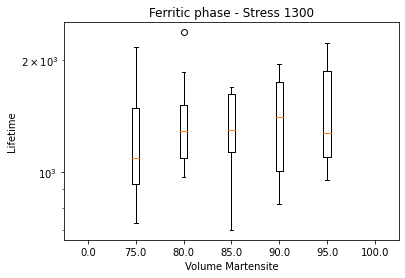

In [90]:
un_stress = np.unique(ll_stress)
stress = 1300.0
ticklist = []
positions = [kk+1 for kk in range(len(un_voll))]
df_whole_bp = df_Ferrite[df_Ferrite['StressAmp']==stress]
for num, vols in enumerate(un_voll):
    bp = plt.boxplot(df_whole_bp[df_whole_bp['Volume_Martensite']==vols]['Lifetime'], positions=[num+1] )
    
    #ticklist.append(np.mean(positions))
    #positions = [kk+1+len(positions) for kk in positions]
    
xlabel = [str(kk) for kk in un_voll]
ticklist = [num +1 for num,kk in enumerate(un_voll)]
plt.xticks(ticklist, xlabel)

plt.ylabel('Lifetime')
plt.xlabel('Volume Martensite')
plt.title(f'Ferritic phase - Stress {str(int(stress))}')
plt.yscale('log')
#plt.ylim(10**2, 5*10**5)
tikzplotlib.save(os.path.join(ImageBoxplots, f'Ferrite_{str(int(stress))}_Life_over_Vol_Box.tex'))

plt.savefig(os.path.join(ImageBoxplots, f'Ferrite_{str(int(stress))}_Life_over_Vol_Box.png'), bbox_inches='tight', dpi=150, transparent=True)

In [26]:
### AChtung lower bound ist nicht ganz korrekt das dieser durch die große varianz eine negative Lebensdauer angeben würde
### dacher ist in diesen Fällen der Lower Bound = minimum der Lebenszeit für definierte Dehnung und Volumengehalt

In [27]:
mnbv= df_lf[df_lf['StressAmp']==1000.0]
mnbv= mnbv[mnbv['Seed']=='93426']
mnbv[mnbv['Volume_Martensite'].isin([95.0,75.0])]

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed,StressAmp
192,69.0,StressTest1_Seed93426_Stress1000_VolumeFraction95,ALL,4396.119336,wholeMod,0.0,0.005196,9.650000e-07,1000.0,0.0,0.019437,0.040827,2.521240,1.724138,0,95.0,93426,1000.0
193,69.1,StressTest1_Seed93426_Stress1000_VolumeFraction95,ALL,10687.954338,Martensite,0.0,0.005196,9.650000e-07,1000.0,0.0,0.002375,0.005701,0.515708,1.724138,0,95.0,93426,1000.0
194,69.2,StressTest1_Seed93426_Stress1000_VolumeFraction95,ALL,4396.119336,Ferrite,0.0,0.005196,9.650000e-07,1000.0,0.0,0.019437,0.040827,2.521240,1.724138,0,95.0,93426,1000.0
213,76.0,StressTest1_Seed93426_Stress1000_VolumeFraction75,ALL,5914.683509,wholeMod,0.0,0.005871,6.210000e-06,1000.0,0.0,0.016364,0.070713,2.521240,1.724138,0,75.0,93426,1000.0
214,76.1,StressTest1_Seed93426_Stress1000_VolumeFraction75,ALL,5914.683509,Ferrite,0.0,0.005871,6.210000e-06,1000.0,0.0,0.016364,0.070713,2.521240,1.724138,0,75.0,93426,1000.0
215,76.2,StressTest1_Seed93426_Stress1000_VolumeFraction75,ALL,15035.568254,Martensite,0.0,0.005871,6.210000e-06,1000.0,0.0,0.001948,0.006487,0.515708,1.724138,0,75.0,93426,1000.0


Bestimme liegt geringste Lebenszeit immer mit Ferrit zusammen? 

In [28]:
#df_lf
ll_model = df_lf['Unnamed: 0'].tolist()

In [29]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) == float(ltime):
                ll_prob_phase.append([len(phases),df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]])        

print(np.unique(ll_prob_phase,axis=0))

TypeError: cannot convert the series to <class 'float'>

In [30]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        ltime = 9e300
        phaseprob = ''
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) < ltime:
                ltime = float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime'])
                phaseprob = df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]
        ll_prob_phase.append([len(phases),phaseprob])        

print(np.unique(ll_prob_phase,axis=0))

TypeError: cannot convert the series to <class 'float'>

In [31]:
strainll = np.unique(df_wholMod['StressAmp'].tolist())
dic_df_StressAmp = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StressAmp': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols] 
            rdf = rdf[rdf['StressAmp'] == strain]
            a = rdf['StrainAmplitude'].tolist()
           
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_StressAmp[dd] = df_conf

Plotten confidence Intervalle bezogen auf Stress::

In [32]:
dic_df_StressAmp['whole']

,StressAmp,l_bound VolF 0.0,mean VolF 0.0,u_bound VolF 0.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,l_bound VolF 85.0,mean VolF 85.0,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,500.0,0.002739,0.002744,0.002749,0.002416,0.002418,0.002420,0.002402,0.002405,0.002407,0.002389,0.002391,0.002394,0.002376,0.002379,0.002382,0.002361,0.002363,0.002365
1,600.0,0.003713,0.003719,0.003726,0.002975,0.002978,0.002980,0.002945,0.002947,0.002950,0.002915,0.002919,0.002922,0.002887,0.002890,0.002894,0.002861,0.002863,0.002865
2,750.0,0.006057,0.006106,0.006154,0.003889,0.003894,0.003898,0.003830,0.003834,0.003838,0.003772,0.003776,0.003781,0.003716,0.003721,0.003727,0.003659,0.003662,0.003666
3,1000.0,NaN,NaN,NaN,0.005643,0.005658,0.005672,0.005485,0.005496,0.005506,0.005341,0.005349,0.005358,0.005206,0.005215,0.005224,0.005082,0.005087,0.005091
4,1300.0,NaN,NaN,NaN,0.008088,0.008120,0.008152,0.007718,0.007739,0.007760,0.007392,0.007407,0.007422,0.007100,0.007113,0.007127,0.006844,0.006850,0.006856


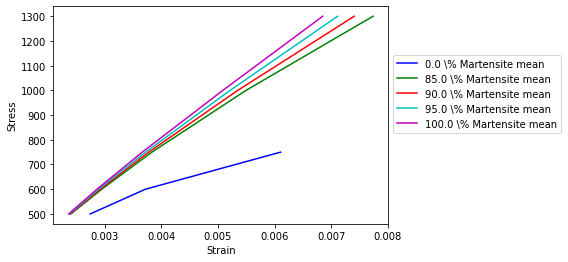

In [33]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y', 'maroon']

df_conf = dic_df_StressAmp['whole']
for num, vols in enumerate(np.unique(volfll)):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StressAmp'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0, 0.8), ncol=1 )

plt.ylabel('Stress')
plt.xlabel('Strain')
plt.title('')

tikzplotlib.save(os.path.join(ImageOrdner, 'StressAmplitude.tex'))

plt.savefig(os.path.join(ImageOrdner, 'StressAmplitude.png'), bbox_inches='tight', dpi=150, transparent=True)

In [34]:
df_conf

,StressAmp,l_bound VolF 0.0,mean VolF 0.0,u_bound VolF 0.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,l_bound VolF 85.0,mean VolF 85.0,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,500.0,0.002739,0.002744,0.002749,0.002416,0.002418,0.002420,0.002402,0.002405,0.002407,0.002389,0.002391,0.002394,0.002376,0.002379,0.002382,0.002361,0.002363,0.002365
1,600.0,0.003713,0.003719,0.003726,0.002975,0.002978,0.002980,0.002945,0.002947,0.002950,0.002915,0.002919,0.002922,0.002887,0.002890,0.002894,0.002861,0.002863,0.002865
2,750.0,0.006057,0.006106,0.006154,0.003889,0.003894,0.003898,0.003830,0.003834,0.003838,0.003772,0.003776,0.003781,0.003716,0.003721,0.003727,0.003659,0.003662,0.003666
3,1000.0,NaN,NaN,NaN,0.005643,0.005658,0.005672,0.005485,0.005496,0.005506,0.005341,0.005349,0.005358,0.005206,0.005215,0.005224,0.005082,0.005087,0.005091
4,1300.0,NaN,NaN,NaN,0.008088,0.008120,0.008152,0.007718,0.007739,0.007760,0.007392,0.007407,0.007422,0.007100,0.007113,0.007127,0.006844,0.006850,0.006856
